In [427]:
class Agent:
    def __init__(self):
        self.actions = ["up","down","left","right"]
        self.pos = (0,0)
        
agent = Agent()

In [428]:
size = 30

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] =0.0
        self.goal = True
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[29][29].set_goal(agent.actions)

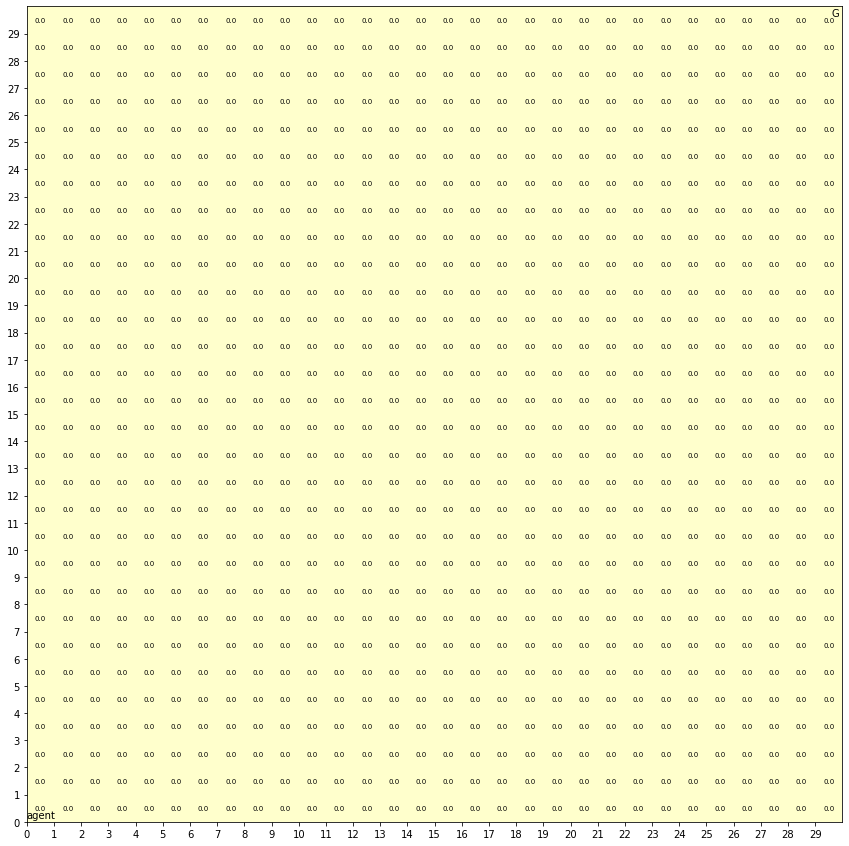

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  

In [429]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos):
    fig, ax = plt.subplots(figsize=(15,15))
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    #print(values)
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=50)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=7)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=10)
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=10)
    
    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=10)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=5)
    
    plt.show()
    fig.clear()
    
    return values
    
draw(None)

In [430]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

In [431]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
        
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1
        
    return (x,y)

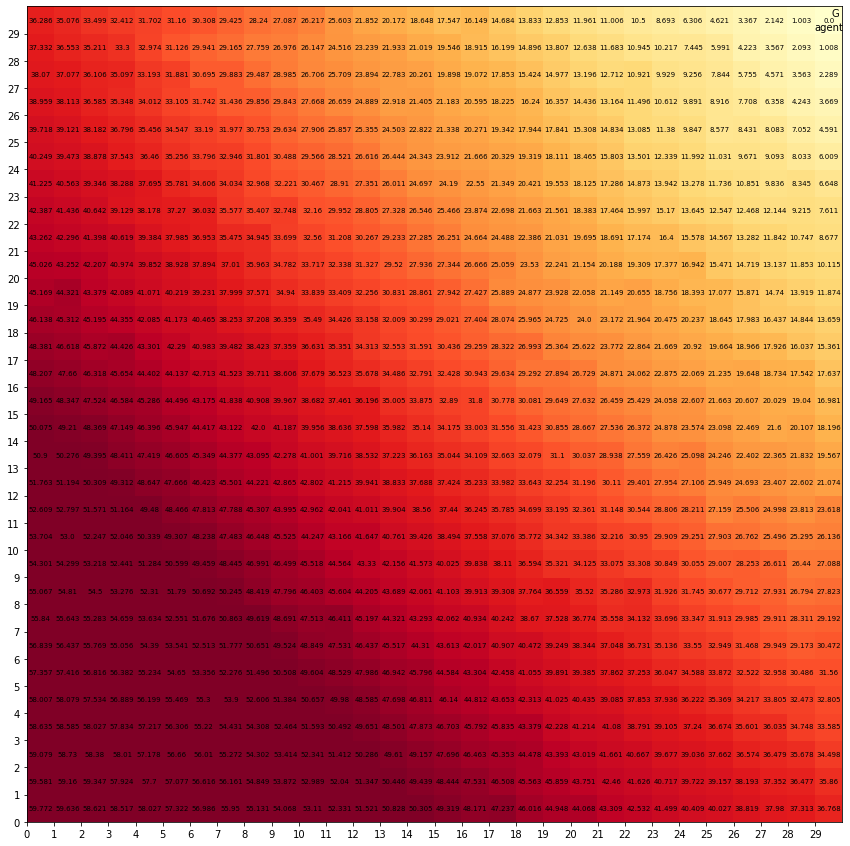

In [432]:
alpha = 0.5
gamma = 1.0

def sarsa(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next]) #Q値の更新式
    #print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    #print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    #agent.pos = (0,0) #毎回原点から探索を開始
    #print(agent.pos)
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        #print(agent.pos)
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            #print("---")
            break
            
for i in range(10000):
    one_trial()
    #z = i%10
    #if z == 0:
    
value_final = draw(None)

In [433]:
print(value_final)

[[59.77277041194083, 59.58186362349242, 59.07994714592088, 58.63528695052662, 58.00716467241493, 57.35746867592818, 56.83979431755565, 55.84029664339366, 55.06733223994864, 54.301433664551126, 53.704267773044975, 52.60966175696843, 51.76353880851276, 50.90063452482883, 50.075707107686995, 49.165249614372776, 48.20706126909322, 48.381975784777055, 46.13892690663949, 45.16994080505518, 45.02654483793976, 43.26207448833257, 42.38793997669514, 41.22572030921488, 40.249119906046744, 39.718287913856415, 38.959347295925625, 38.07023754526933, 37.33255644772046, 36.28681955053655], [59.63679548486117, 59.16002996584683, 58.73048530190525, 58.58576031528711, 58.07932061425119, 57.41633944761435, 56.43704146436406, 55.64323949531765, 54.81064939537052, 54.29917467877746, 53.00091862571456, 52.79738478063525, 51.19457477669998, 50.276604727745124, 49.21006076701239, 48.34701903536718, 47.66090289712917, 46.6186934808852, 45.31226648950682, 44.321572559100225, 43.25203944981743, 42.29645655065116,

In [434]:
print(value_final[28][29])

1.0035473960574222


In [435]:

a = value_final[28][29]
b = value_final[29][28]
max_q = max(a,b)
print(max_q)

1.0084348589898473


In [447]:
def final_trial():
    #agent.pos = (random.randrange(size),random.randrange(size))
    agent.pos = (0,0) #原点から探索を開始
    print(agent.pos)
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = value_final
        agent.pos = s_next
        print(s_next)
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            print("---")
            break

final_trial()
dump = draw(None)

(0, 0)


TypeError: '>' not supported between instances of 'float' and 'list'

In [444]:
if dump == value_final:
    print("OK")

OK


In [445]:
print(agent.pos)

(29, 29)
